# PREPROCESSING NOTEBOOK 

In [17]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

## Import Data

In [18]:
train_df = pd.read_csv('../dataset/train.csv')
train_df.drop_duplicates(inplace=True)
train_df.drop(columns=['id'], inplace=True)

test_df = pd.read_csv('../dataset/test.csv')
test_df.drop(columns=['id'], inplace=True)

sample_submission = pd.read_csv('../dataset/sample_submission.csv')

## UTILS 

In [19]:
def numerical_distrib_analysis(data, numerical_features):
    """
    Analyse la distribution des variables numériques avec histogrammes et boxplots.
    
    :param data: DataFrame Pandas contenant les données
    :param numerical_features: Liste des noms de colonnes numériques
    """
    
    for feature in numerical_features:
        plt.figure(figsize=(12, 5))

        # Histogramme avec KDE
        plt.subplot(1, 2, 1)
        sns.histplot(data[feature], kde=True, bins=30)
        plt.title(f"Histogram of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")

        # Box plot pour détecter les outliers
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[feature])
        plt.title(f"Box Plot of {feature}")

        plt.tight_layout()
        plt.show()

        # Statistiques supplémentaires
        print(f"\nStatistics for {feature}:")
        print(f"Skewness: {data[feature].skew():.2f}")
        print(f"Number of Missing Values: {data[feature].isnull().sum()}")


def numerical_correlation_analysis(data, numerical_features, target):

    """
    Analyse et visualisation des relations entre les variables numériques et la variable cible.

    :param data: DataFrame Pandas contenant les données.
    :param numerical_features: Liste des colonnes numériques à analyser.
    :param target: Nom de la variable cible.
    """
    
    # Scatter plots pour chaque variable numérique (sauf la cible)
    for feature in numerical_features:
        if feature != target:  # Exclure la variable cible
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=data[feature], y=data[target], alpha=0.5)
            plt.title(f"{feature} vs. {target}")
            plt.xlabel(feature)
            plt.ylabel(target)
            plt.show()

    # Matrice de corrélation
    correlation_matrix = data[numerical_features].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix of Numerical Features")
    plt.show()


def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_

    # Create df with features and their importances 
    feature_importance = pd.DataFrame({
        'feature': feature_names, 
        'importance': importance 
    })

    # Sort by importance 
    feature_importance = feature_importance.sort_values('importance', ascending=False)

    # Create the plot 
    plt.figure(figsize=(12,6))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(20))
    plt.title('Top 20 Most Important Features')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()
    
    # Show numerical values 
    print("\nTop 20 features par importance:")
    print(feature_importance.head(20))

## EDA

### Feature Distribution Analysis 

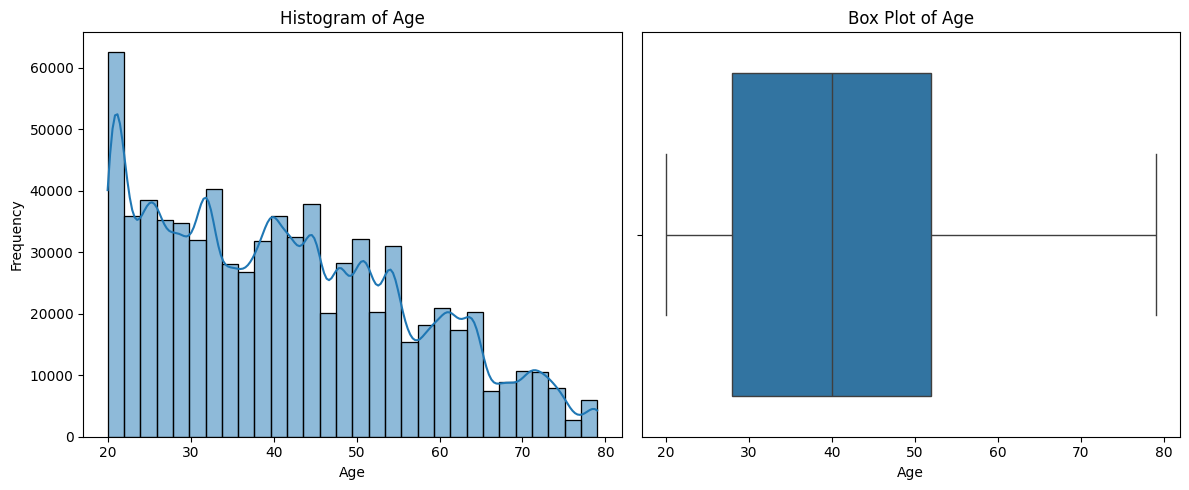


Statistics for Age:
Skewness: 0.44
Number of Missing Values: 0


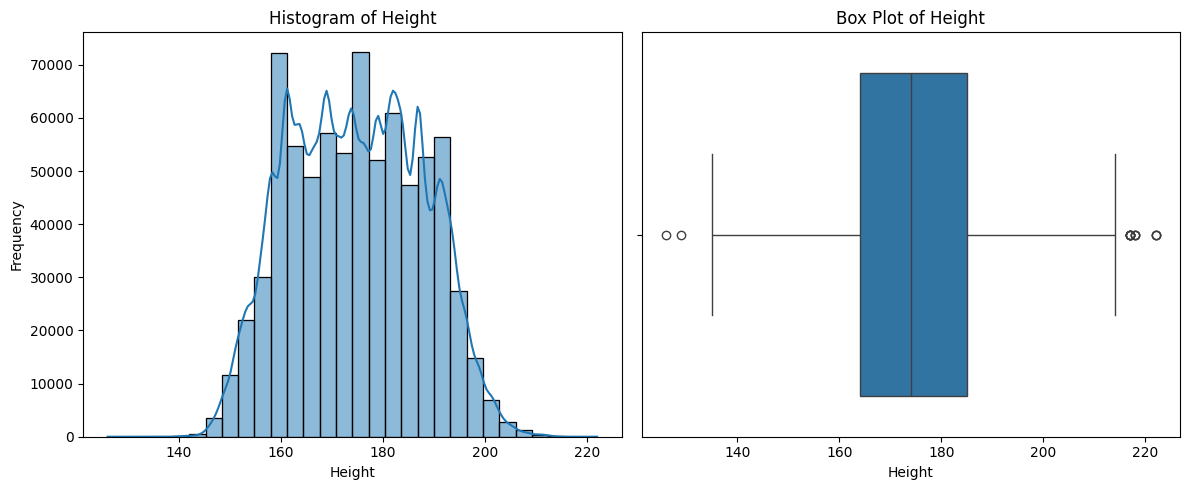


Statistics for Height:
Skewness: 0.05
Number of Missing Values: 0


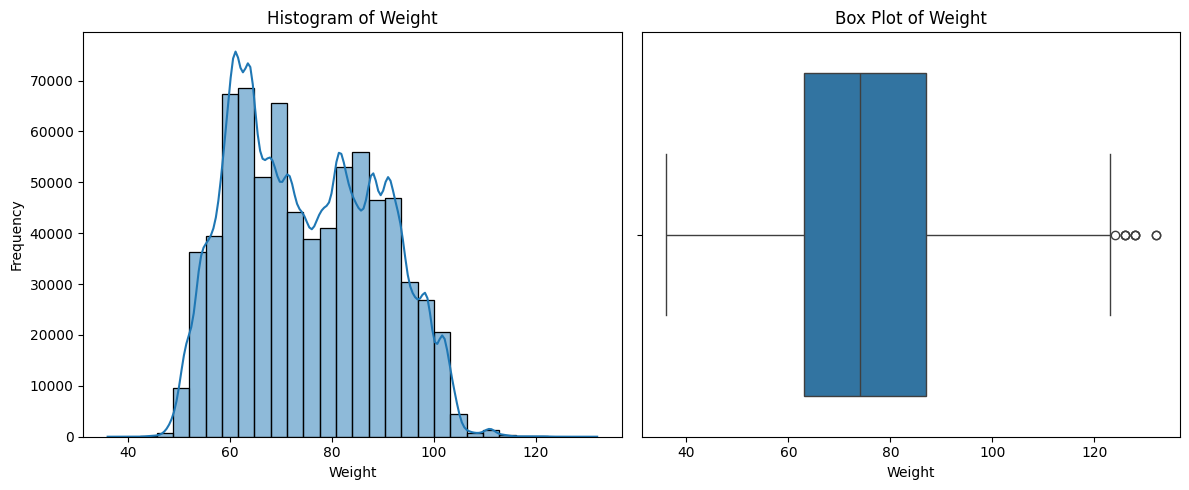


Statistics for Weight:
Skewness: 0.21
Number of Missing Values: 0


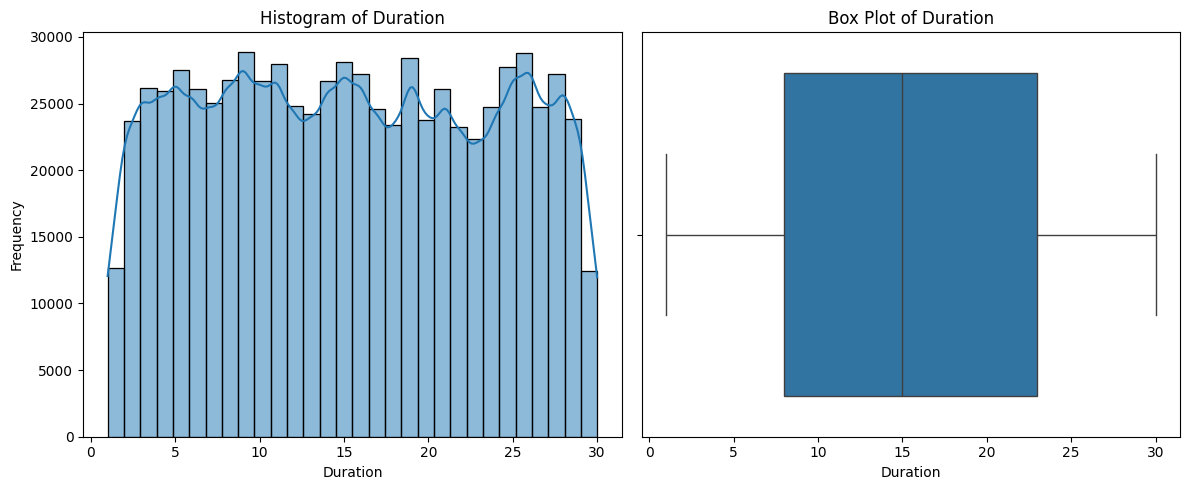


Statistics for Duration:
Skewness: 0.03
Number of Missing Values: 0


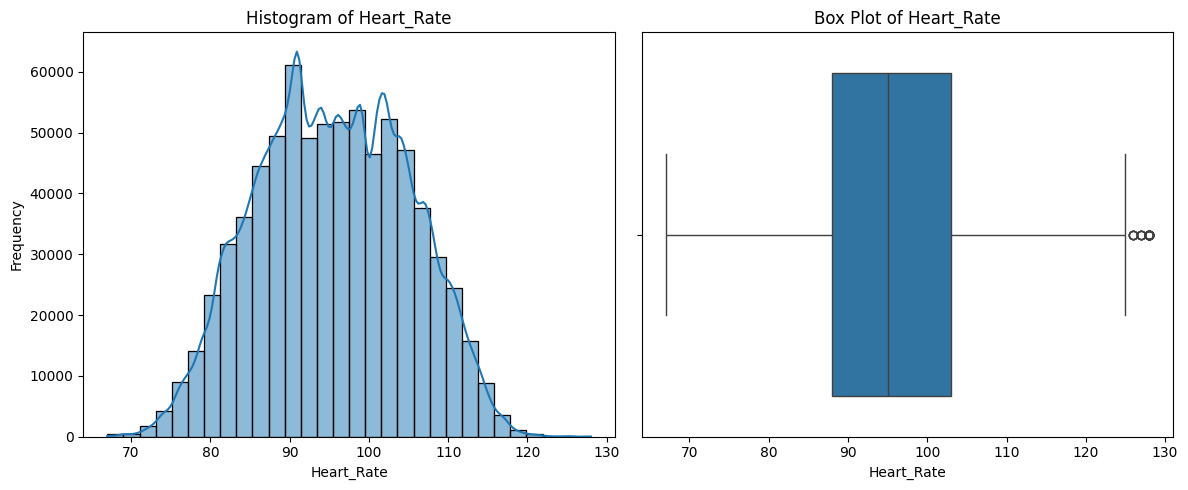


Statistics for Heart_Rate:
Skewness: -0.01
Number of Missing Values: 0


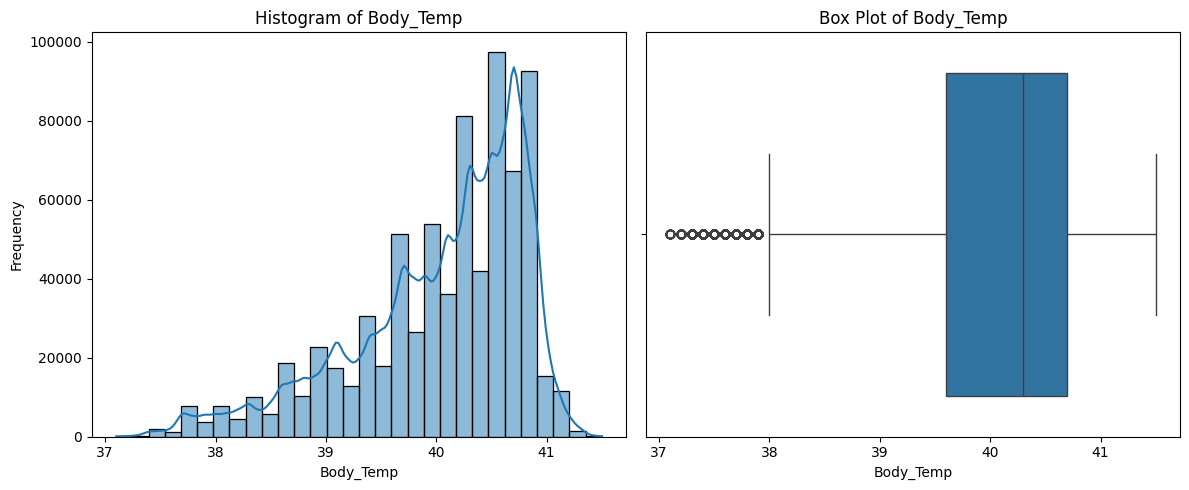


Statistics for Body_Temp:
Skewness: -1.02
Number of Missing Values: 0


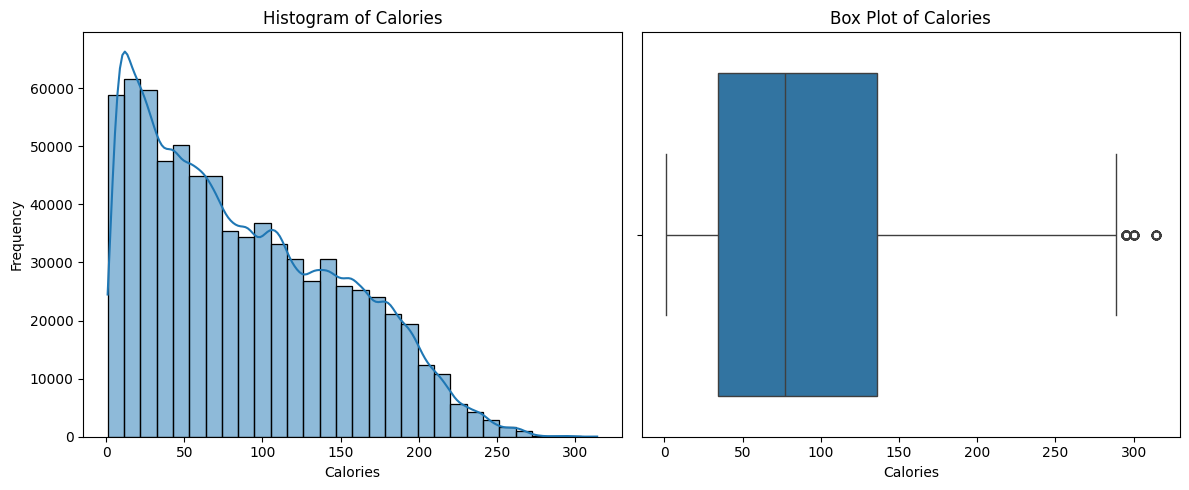


Statistics for Calories:
Skewness: 0.54
Number of Missing Values: 0


In [20]:
numerical_distrib_analysis(train_df, train_df.iloc[:, 1:])

### Feature Correlation Analysis

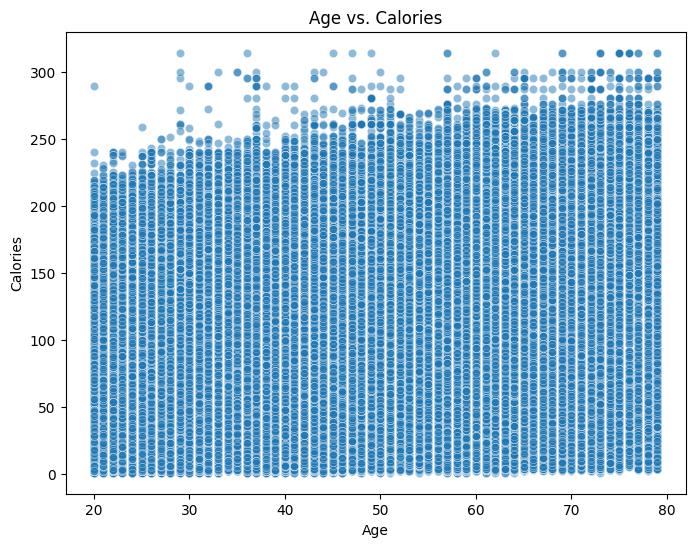

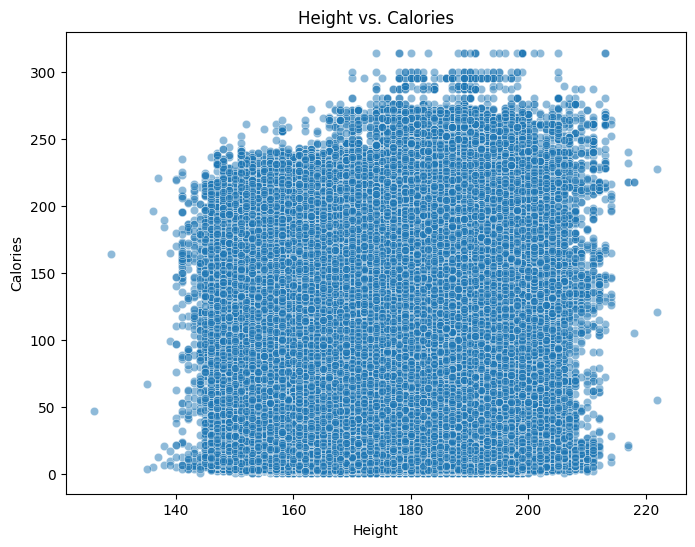

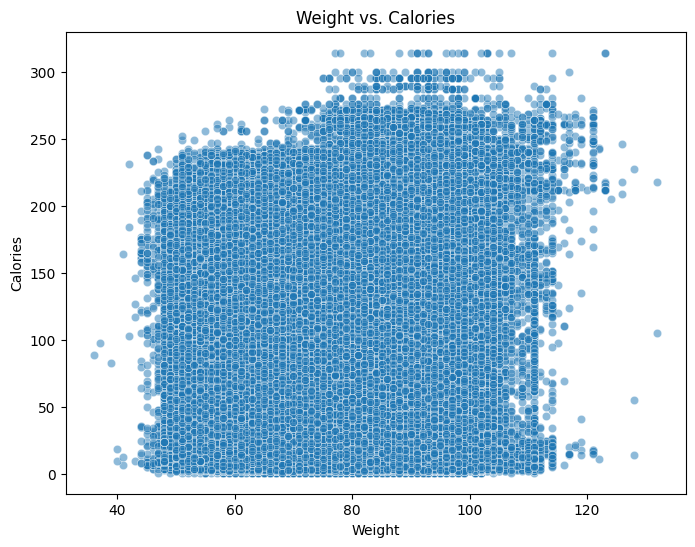

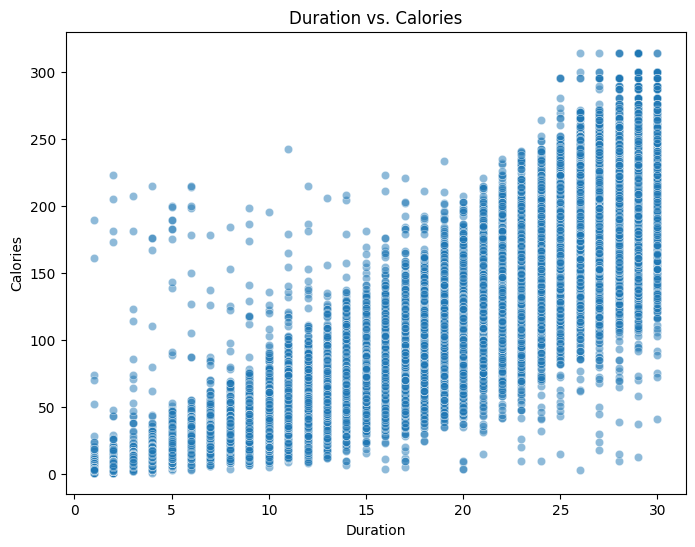

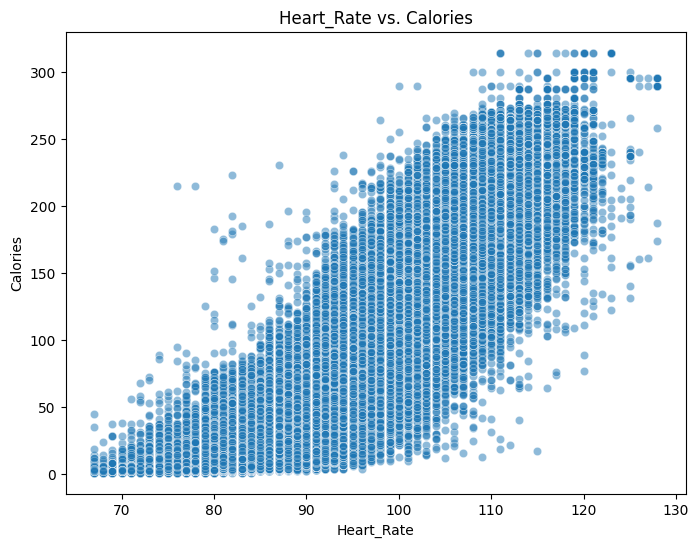

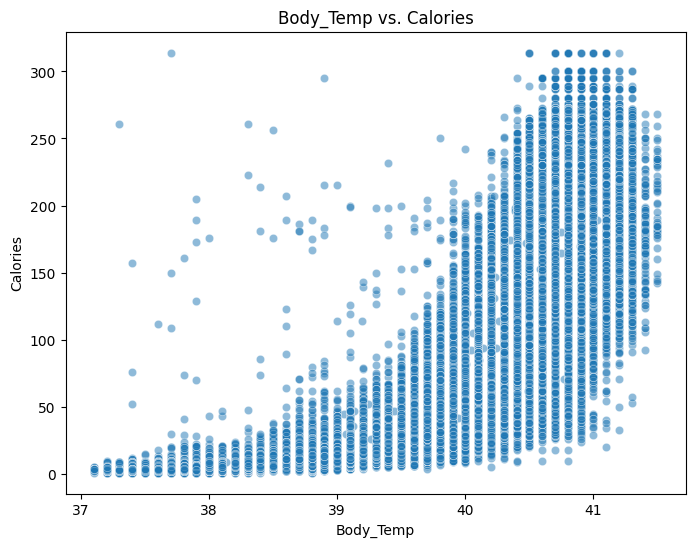

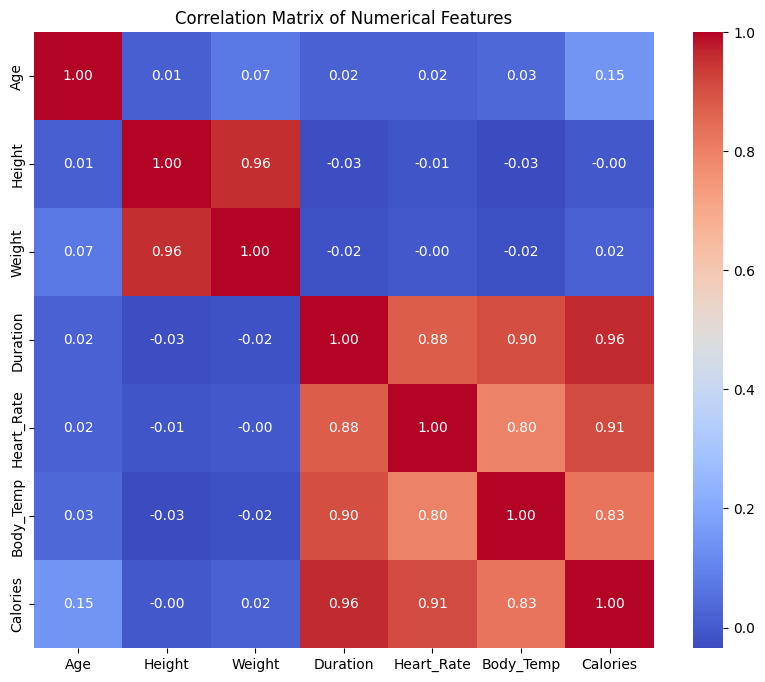

In [21]:
nums = train_df.iloc[:, 1:].columns.tolist()
target = 'Calories'

numerical_correlation_analysis(train_df, nums, target)

## Feature Engineering

### Encoding Categorical Features

In [22]:
from sklearn.preprocessing import LabelEncoder
from itertools import combinations

le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.transform(test_df['Sex'])

### Combining Numerical Features

In [23]:
numerical_features = ["Age", "Height", "Weight","Duration","Heart_Rate","Body_Temp"]

def add_feature_cross_terms(df, numerical_features):
    df_new = df.copy()
    for i in range(len(numerical_features)):
        for j in range(i + 1, len(numerical_features)):  
            feature1 = numerical_features[i]
            feature2 = numerical_features[j]
            cross_term_name = f"{feature1}_x_{feature2}"
            df_new[cross_term_name] = df_new[feature1] * df_new[feature2]
    return df_new



train_df = add_feature_cross_terms(train_df, numerical_features)
test_df = add_feature_cross_terms(test_df, numerical_features)

### Setting up files for training 

In [25]:
X = train_df.drop(columns=['Calories'])
y = np.log1p(train_df['Calories'])
X_test = test_df.copy()

X.to_csv("data/X.csv", index=False)
y.to_csv("data/y.csv", index=False)
X_test.to_csv("data/X_test.csv", index=False)
